In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.neural_network import MLPClassifier

In [2]:
path = "D:/Study/MSIT/2nd Year/DataScience_2019501007/Intro to Machine Learning/Code Camp/Logistic Regression/"

In [3]:
train = path + "train.csv"
test = path + "test.csv"
trainx_df = pd.read_csv(train)
print(trainx_df.shape)

(7414, 22)


In [4]:
trainy_df = trainx_df['responded']
print(trainy_df.shape)

(7414,)


In [5]:
trainx_df.drop('responded', axis = 1, inplace = True)
test_df = pd.read_csv(test)
print(test_df.shape)

(824, 22)


In [6]:
sample_size = len(trainx_df)
columns_with_null_values = []
for col in trainx_df.columns:
    if trainx_df[col].isnull().sum():
        columns_with_null_values.append([col, float(trainx_df[col].isnull().sum()) / float(sample_size)])
print(columns_with_null_values)

[['custAge', 0.2433234421364985], ['schooling', 0.29066630698678175], ['day_of_week', 0.09589964931211221]]


In [7]:
columns_to_drop = [x for (x,y) in columns_with_null_values if y > 0.25]
print(columns_to_drop)

['schooling']


In [8]:
trainx_df.drop(columns_to_drop, axis = 1, inplace = True)
test_df.drop(columns_to_drop, axis = 1, inplace = True)
print(len(trainx_df.columns))
print(trainx_df.shape)

20
(7414, 20)


In [9]:
categorical_columns = [col for col in trainx_df.columns if trainx_df[col].dtype == object]
print(len(categorical_columns))
ordinal_columns = [col for col in trainx_df.columns if col not in categorical_columns]
print(len(ordinal_columns))

9
11


In [10]:
dummy_row = list()
for col in trainx_df.columns:
    if col in categorical_columns:
        dummy_row.append('dummy')
    else:
        dummy_row.append("")
print(dummy_row)

['', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', '', '', '', 'dummy', '', '', '', '', '', '', '']


In [11]:
new_row = pd.DataFrame([dummy_row], columns = trainx_df.columns)
trainx_df = pd.concat([trainx_df, new_row], axis = 0, ignore_index = True)
test_df = pd.concat([test_df, new_row], axis = 0, ignore_index = True)
for col in categorical_columns:
    trainx_df[col].fillna(value = 'dummy', inplace = True)
    test_df[col].fillna(value = 'dummy', inplace = True)

In [12]:
enc = OneHotEncoder(drop = 'first', sparse = False)
enc.fit(trainx_df[categorical_columns])
trainx_enc = pd.DataFrame(enc.transform(trainx_df[categorical_columns]))
test_enc = pd.DataFrame(enc.transform(test_df[categorical_columns]))
print(trainx_df.shape)
print(test_df.shape)
trainx_enc.columns = enc.get_feature_names(categorical_columns)
test_enc.columns = enc.get_feature_names(categorical_columns)
trainx_df = pd.concat([trainx_df[ordinal_columns], trainx_enc], axis = 1, ignore_index = True)
test_df = pd.concat([test_df[ordinal_columns], test_enc], axis = 1, ignore_index = True)
print(len(trainx_df.columns))

(7415, 20)
(825, 21)
56


In [13]:
trainx_df.drop(trainx_df.tail(1).index, inplace = True)
test_df.drop(test_df.tail(1).index, inplace = True)
print(trainx_df.shape)

(7414, 56)


In [14]:
imputer = KNNImputer(n_neighbors = 5)
imputer.fit(trainx_df)
trainx_df_filled = imputer.transform(trainx_df)
trainx_df_filled = pd.DataFrame(trainx_df_filled, columns = trainx_df.columns)
print(trainx_df_filled.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
dtype: int64


In [15]:
test_df_filled = imputer.transform(test_df)
test_df_filled = pd.DataFrame(test_df_filled, columns = test_df.columns)
test_df_filled.reset_index(drop = True, inplace = True)

In [16]:
scaler = preprocessing.StandardScaler().fit(trainx_df)
trainx_df = scaler.transform(trainx_df_filled)
test_df = scaler.transform(test_df_filled)
print(trainx_df.shape)
print(test_df.shape)

(7414, 56)
(824, 56)


In [17]:
trainy_df = preprocessing.LabelEncoder().fit_transform(trainy_df)

In [18]:
pca = PCA().fit(trainx_df)
itemindex = np.where(np.cumsum(pca.explained_variance_ratio_) > 0.9999)
print('np.cumsum(pca.explained_variance_ratio_)',      np.cumsum(pca.explained_variance_ratio_))

np.cumsum(pca.explained_variance_ratio_) [0.1220191  0.17783036 0.22365869 0.26785491 0.3091537  0.34674798
 0.38231995 0.41616126 0.44833345 0.47860954 0.50506274 0.52906905
 0.55297241 0.57664832 0.59998993 0.62324224 0.64552744 0.66694687
 0.68787127 0.70859252 0.72909471 0.74940209 0.76939904 0.78920048
 0.80853157 0.82784875 0.84703002 0.86556017 0.88345626 0.90132994
 0.91867629 0.93552568 0.9518571  0.96050129 0.96799357 0.97529045
 0.98065759 0.98551986 0.98947341 0.99324647 0.99549352 0.99754911
 0.99874023 0.99988117 0.99995912 0.99999989 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


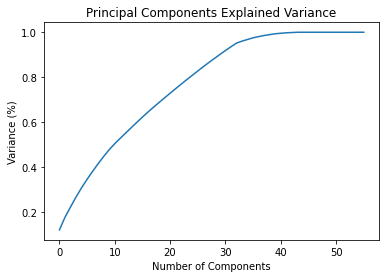

In [19]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(np.cumsum(pca.explained_variance_ratio_)[0])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Principal Components Explained Variance')
plt.show()

In [20]:
pca_std = PCA(n_components = itemindex[0][0]).fit(trainx_df)
trainx_df = pca_std.transform(trainx_df)
test_df = pca_std.transform(test_df)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(trainx_df, trainy_df, test_size = 0.3, random_state = 42)

print("Results for Logistic Regression")

Results for Logistic Regression


In [22]:
logreg = LogisticRegression(class_weight = "balanced", C = 0.00001, max_iter = 1000000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1e-05, class_weight='balanced', max_iter=1000000)

In [23]:
yprobs = logreg.predict_log_proba(X_test)
yprobs = yprobs[ : , 1]
ras = roc_auc_score(y_test, yprobs,average = 'weighted')
print(ras)
yhat = logreg.predict(X_test)

0.7801199448312003


In [24]:
TP, TN, FP, FN = 0, 0, 0, 0
for i in range(len(yhat)):
    if yhat[i] == 0:
        if y_test[i] == 0:
            TN += 1
        else:
            FN += 1
    else:
        if y_test[i] == 1:
            TP += 1
        else:
            FP += 1
print(classification_report(y_test, yhat))
print(classification_report(y_test, yhat, output_dict = True)['1']['precision'], classification_report(y_test, yhat, output_dict = True)['1']['recall'])
fpr, tpr, threshold = roc_curve(y_test, yprobs)
roc_auc = auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1942
           1       0.37      0.59      0.45       283

    accuracy                           0.82      2225
   macro avg       0.65      0.72      0.67      2225
weighted avg       0.86      0.82      0.84      2225

0.3684210526315789 0.5936395759717314


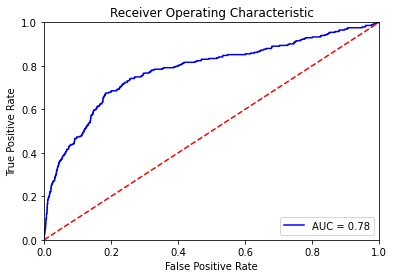

In [25]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
print([TP, TN, FP, FN, TP / (TP + FN), TN / (TN + FP)])
print("Results for SVM Classifier")

svcmodel = SVC(C = 0.5, degree = 2, kernel = 'poly')
svcmodel.fit(X_train, y_train)

[168, 1654, 288, 115, 0.5936395759717314, 0.8516992790937178]
Results for SVM Classifier


SVC(C=0.5, degree=2, kernel='poly')

In [27]:
yhat = svcmodel.predict(X_test)
#pd.DataFrame(yhat).to_csv(model)
TP, TN, FP, FN = 0, 0, 0, 0
for i in range(len(yhat)):
    if yhat[i] == 0:
        if y_test[i] == 0:
            TN += 1
        else:
            FN += 1
    else:
        if y_test[i] == 1:
            TP += 1
        else:
            FP += 1
print(classification_report(y_test, yhat))
print(classification_report(y_test, yhat, output_dict = True)['1']['precision'], classification_report(y_test, yhat, output_dict = True)['1']['recall'])
print([TP, TN, FP, FN, TP /(TP + FN), TN /(TN + FP)])

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1942
           1       0.68      0.21      0.32       283

    accuracy                           0.89      2225
   macro avg       0.79      0.60      0.63      2225
weighted avg       0.87      0.89      0.86      2225

0.6781609195402298 0.20848056537102475
[59, 1914, 28, 224, 0.20848056537102475, 0.9855818743563337]


In [28]:
print("Results for Back Propagation Classifier")
nn_bp_model = MLPClassifier(solver = 'lbfgs', alpha = 0.01, hidden_layer_sizes = (7, ), random_state = 1, max_iter = 10000)
nn_bp_model.fit(X_train, y_train)

Results for Back Propagation Classifier


MLPClassifier(alpha=0.01, hidden_layer_sizes=(7,), max_iter=10000,
              random_state=1, solver='lbfgs')

In [29]:
yprobs = nn_bp_model.predict_log_proba(X_test)
yprobs = yprobs[ : , 1]
ras = roc_auc_score(y_test, yprobs, average = 'weighted')
print(ras)
yhat = nn_bp_model.predict(X_test)
#pd.DataFrame(yhat).to_csv(model)
TP, TN, FP, FN = 0, 0, 0, 0
for i in range(len(yhat)):
    if yhat[i] == 0:
        if y_test[i] == 0:
            TN += 1
        else:
            FN += 1
    else:
        if y_test[i] == 1:
            TP += 1
        else:
            FP += 1
print(classification_report(y_test, yhat))
print(classification_report(y_test, yhat, output_dict = True)['1']['precision'], classification_report(y_test, yhat, output_dict = True)['1']['recall'])
fpr, tpr, threshold = roc_curve(y_test, yprobs)
roc_auc = auc(fpr, tpr)

0.730003129628484
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1942
           1       0.55      0.29      0.38       283

    accuracy                           0.88      2225
   macro avg       0.73      0.63      0.65      2225
weighted avg       0.86      0.88      0.86      2225

0.5472972972972973 0.2862190812720848


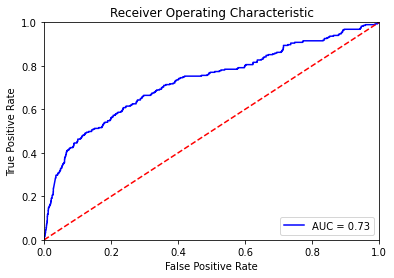

[81, 1875, 67, 202, 0.2862190812720848, 0.9654994850669413]


In [30]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print([TP, TN, FP, FN, TP / (TP + FN), TN / (TN + FP)])